1. Clean the data and perform some EDA and visualization to get to know the data set.


Columns in dataset: ['Host Id', 'Host Since', 'Name', 'Neighbourhood', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']

Summary Statistics:
             Host Id  Review Scores Rating (bin)       Zipcode          Beds  \
count  2.201000e+04                22010.000000  22010.000000  22010.000000   
mean   1.104878e+07                   90.733303  10575.345252      1.556747   
std    1.080069e+07                    9.069740    597.744310      1.043374   
min    5.000000e+02                   20.000000   7105.000000      0.000000   
25%    2.242476e+06                   85.000000  10016.000000      1.000000   
50%    6.901950e+06                   90.000000  10044.000000      1.000000   
75%    1.808719e+07                  100.000000  11216.000000      2.000000   
max    4.272660e+07                  100.000000  11694.000000     16.000000   

       Number of Records  Number Of Revi

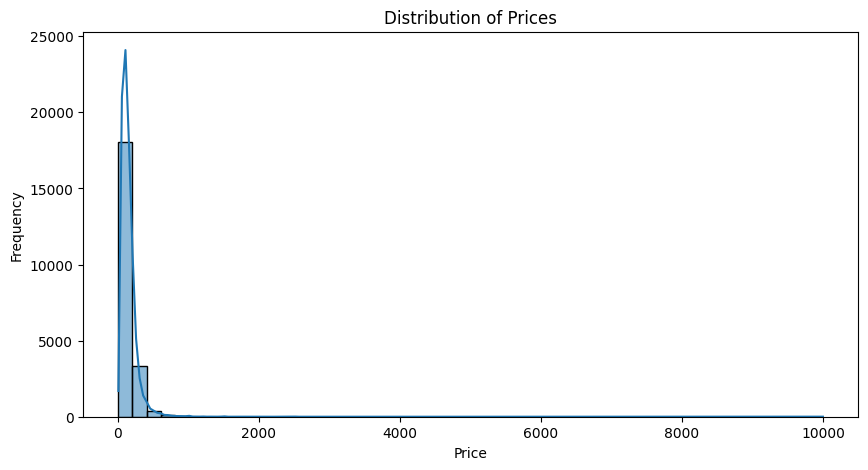

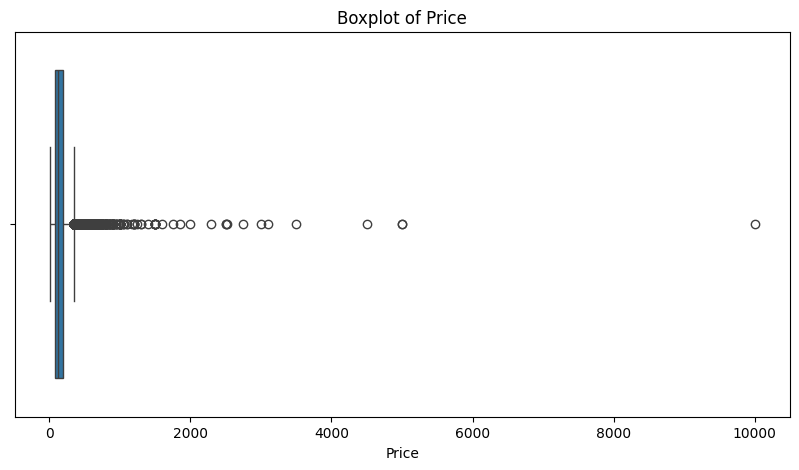

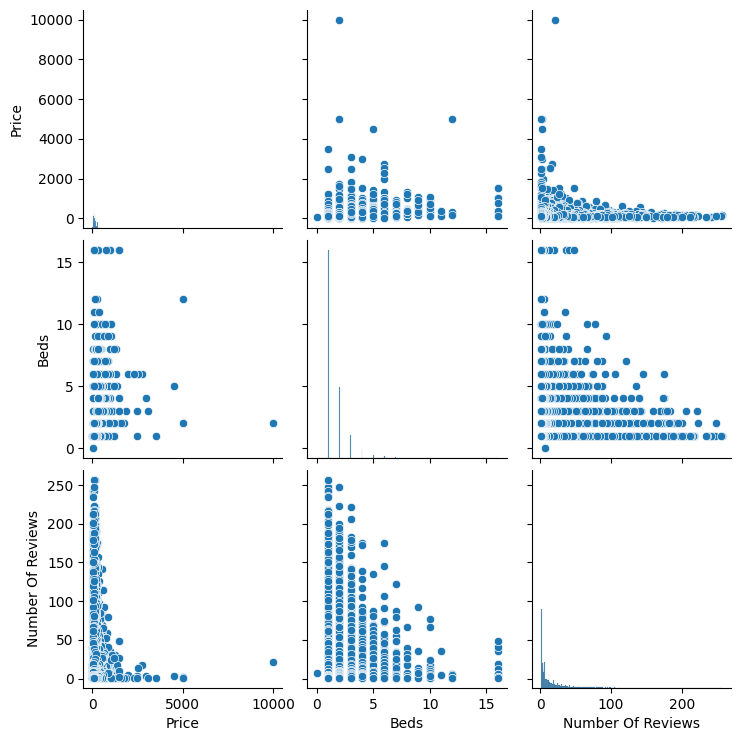

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/ds4e/linearModels/main/lab/data/airbnb_hw.csv'
df = pd.read_csv(url)

# Standardize column names (strip extra spaces)
df.columns = df.columns.str.strip()

# Convert 'Price' to numeric (removes dollar signs and commas)
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing values
df = df.dropna()

# Display cleaned column names
print("\nColumns in dataset:", df.columns.tolist())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Distribution of Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Price (outlier detection)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Select relevant numeric columns for pairplot
pairplot_columns = ['Price', 'Beds', 'Number Of Reviews']
df_numeric = df[pairplot_columns]

# Pairplot for numerical features
sns.pairplot(df_numeric)
plt.show()


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical variables to encode
categorical_columns = ['Neighbourhood', 'Property Type', 'Review Scores Rating (bin)', 'Room Type']

# Apply LabelEncoder to all categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Check transformed categorical variables
print("\nTransformed Categorical Variables:")
print(df[categorical_columns].head())



Transformed Categorical Variables:
   Neighbourhood  Property Type  Review Scores Rating (bin)  Room Type
4              2              0                          13          1
5              1              0                          14          0
6              2              0                          14          0
7              1              0                          12          1
8              2              0                          12          0


3. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [52]:
# Apply log transformation to 'Price'
df['Log_Price'] = np.log(df['Price'] + 1)  # Adding 1 to avoid log(0) issues

# Define the features (X) and target variable (y)
X = df[['Review Scores Rating', 'Beds', 'Number Of Reviews', 'Neighbourhood',
        'Property Type', 'Review Scores Rating (bin)', 'Room Type']]  # Use original features
y = df['Log_Price']  # Use the log-transformed price as the target variable

# Perform a train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



4. Build ome simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and
 on the both the training and test sets. Which of your models does the best?

In [66]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# List of features to test in simple linear models (one at a time)
feature_list = X_train.columns

# Dictionary to store RMSE and R² results
results = {}

for feature in feature_list:
    # Reshape feature into 2D array for model fitting
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    # Initialize and fit Linear Regression model
    model = LinearRegression()
    model.fit(X_train_feature, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_feature)
    y_test_pred = model.predict(X_test_feature)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Calculate R²
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results[feature] = {
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R²": train_r2,
        "Test R²": test_r2
    }

# Find the best model based on lowest test RMSE
best_feature = min(results, key=lambda x: results[x]["Test RMSE"])

# Print RMSE and R² results
print("RMSE and R² Results for Simple Linear Models:")
for feature, scores in results.items():
    print(f"{feature}: Train RMSE = {scores['Train RMSE']:.4f}, Test RMSE = {scores['Test RMSE']:.4f}, Train R² = {scores['Train R²']:.4f}, Test R² = {scores['Test R²']:.4f}")

print(f"\nBest Model: {best_feature} with Test RMSE = {results[best_feature]['Test RMSE']:.4f} and Test R² = {results[best_feature]['Test R²']:.4f}")


RMSE and R² Results for Simple Linear Models:
Review Scores Rating: Train RMSE = 0.5769, Test RMSE = 0.5803, Train R² = 0.0130, Test R² = 0.0149
Beds: Train RMSE = 0.5302, Test RMSE = 0.5366, Train R² = 0.1665, Test R² = 0.1576
Number Of Reviews: Train RMSE = 0.5805, Test RMSE = 0.5852, Train R² = 0.0008, Test R² = -0.0019
Neighbourhood: Train RMSE = 0.5766, Test RMSE = 0.5820, Train R² = 0.0141, Test R² = 0.0092
Property Type: Train RMSE = 0.5799, Test RMSE = 0.5832, Train R² = 0.0028, Test R² = 0.0051
Review Scores Rating (bin): Train RMSE = 0.5773, Test RMSE = 0.5809, Train R² = 0.0118, Test R² = 0.0129
Room Type: Train RMSE = 0.4329, Test RMSE = 0.4348, Train R² = 0.4443, Test R² = 0.4469

Best Model: Room Type with Test RMSE = 0.4348 and Test R² = 0.4469


5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?


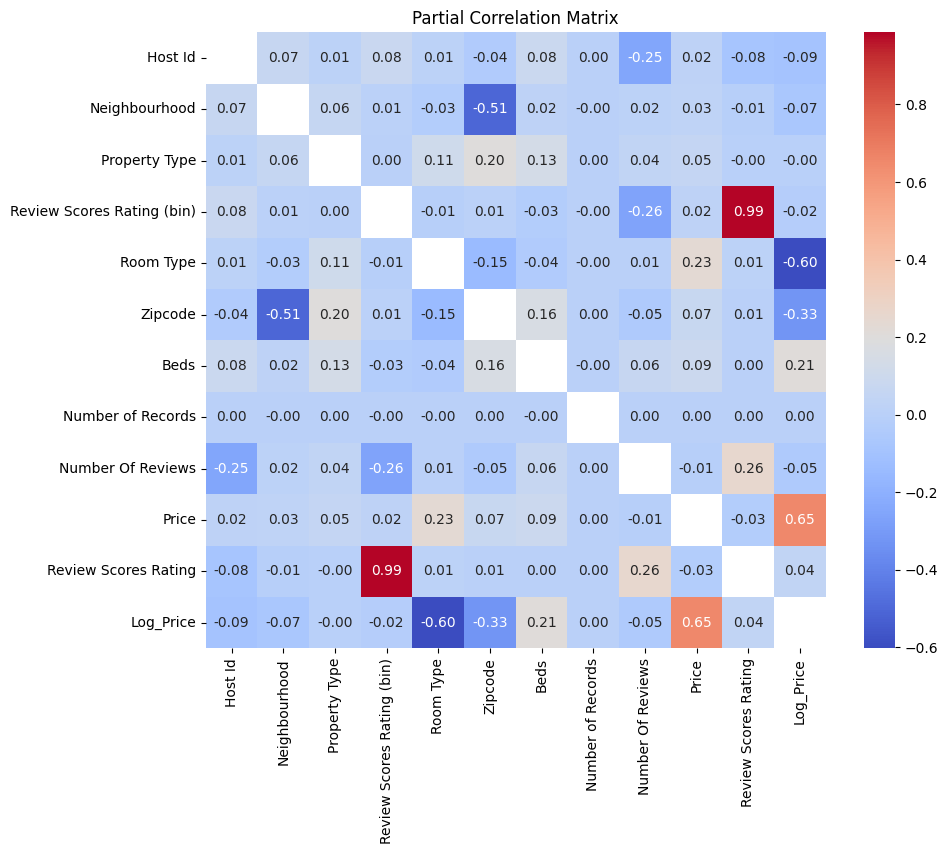

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Select numeric variables from the dataset
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_columns].dropna()  # Drop missing values

# Initialize the partial correlation matrix
partial_corr_matrix = pd.DataFrame(index=numeric_columns, columns=numeric_columns, dtype=float)

# Compute partial correlations
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1 != col2:
            # Select predictors excluding col1 and col2
            predictors = df_numeric.drop(columns=[col1, col2], errors='ignore')

            if predictors.shape[1] > 0:  # Ensure at least one predictor remains
                X = sm.add_constant(predictors)

                # Fit linear models to get residuals
                model_col1 = sm.OLS(df_numeric[col1], X).fit()
                model_col2 = sm.OLS(df_numeric[col2], X).fit()

                residuals_col1 = model_col1.resid
                residuals_col2 = model_col2.resid

                # Compute correlation of residuals
                partial_corr_matrix.loc[col1, col2] = np.corrcoef(residuals_col1, residuals_col2)[0, 1]
            else:
                partial_corr_matrix.loc[col1, col2] = np.nan  # Assign NaN if no predictors available

# Convert matrix to float type
partial_corr_matrix = partial_corr_matrix.astype(float)

# Plot the partial correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(partial_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Partial Correlation Matrix')
plt.show()



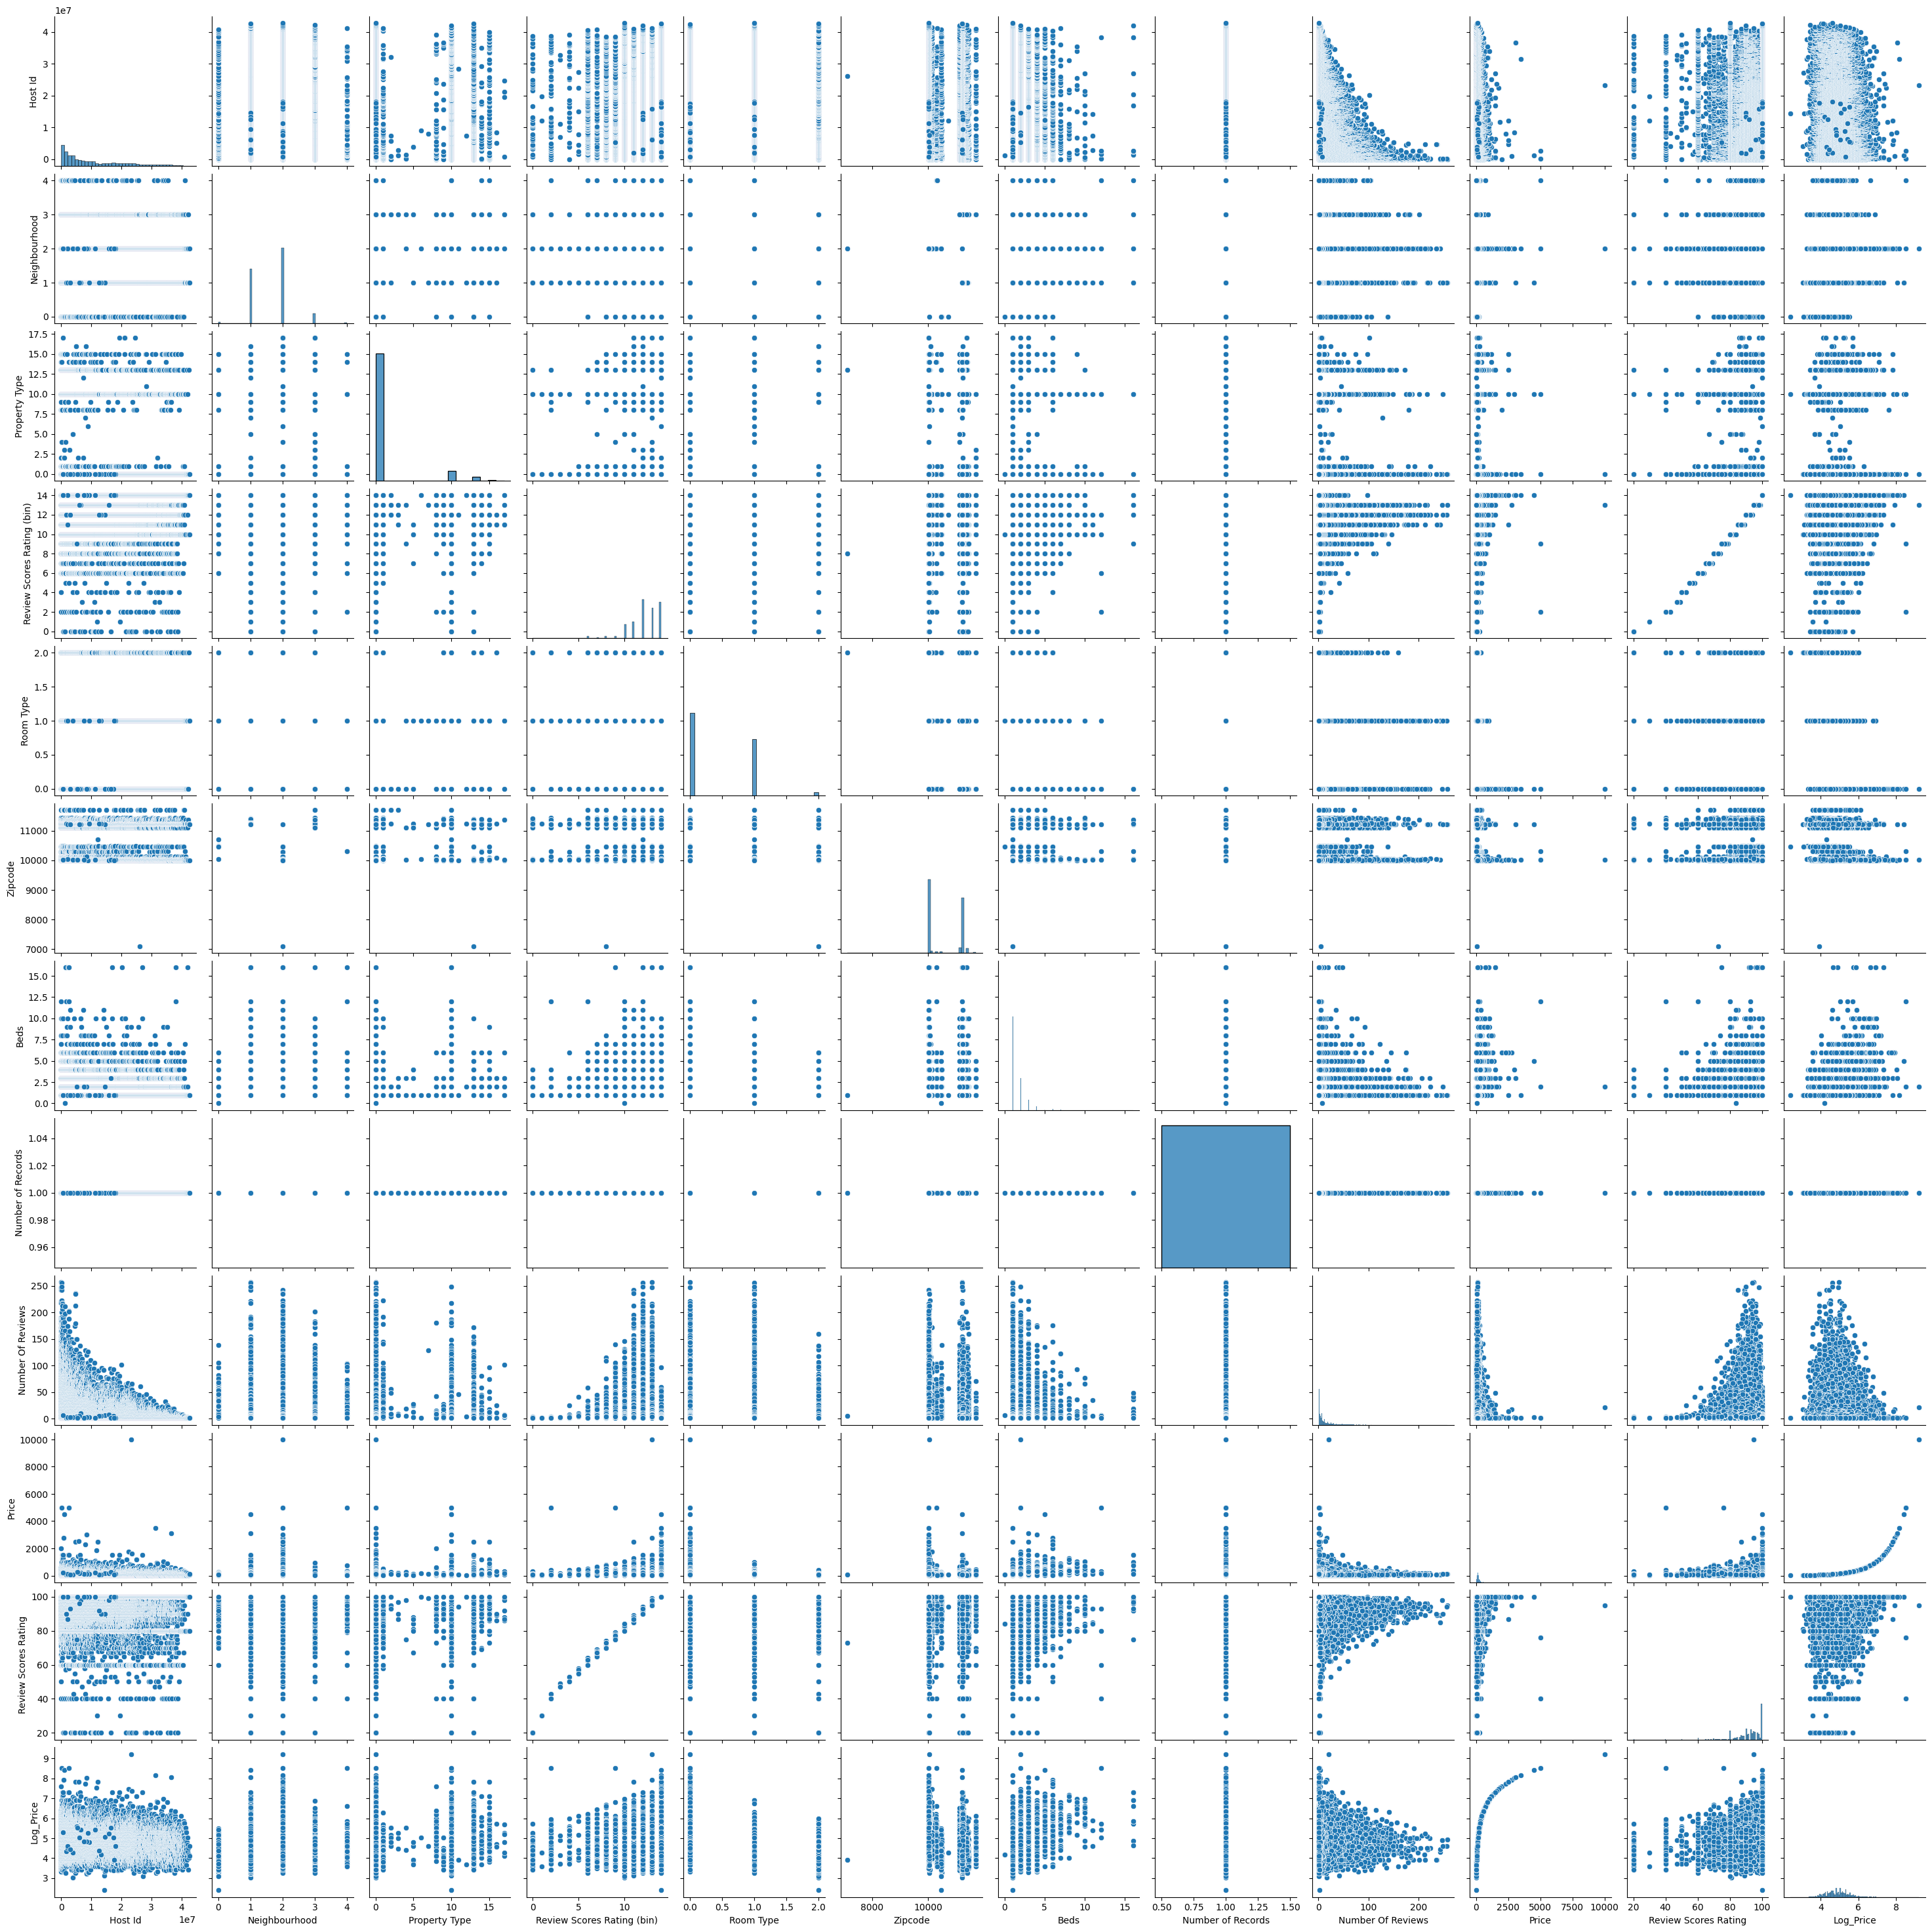

In [56]:
# Pairplot to inspect relationships between numeric features
sns.pairplot(df[numeric_columns])
plt.show()

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and R^2
 on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [57]:
# Drop the duplicate columns (keeping the first occurrence)
X_train_imputed = X_train_imputed.loc[:, ~X_train_imputed.columns.duplicated()]
X_test_imputed = X_test_imputed.loc[:, ~X_test_imputed.columns.duplicated()]

# Verify the columns after removing duplicates
print(X_train_imputed.columns)

# Now create the interaction term
X_train_imputed['Beds_Reviews'] = X_train_imputed['Beds'] * X_train_imputed['Number Of Reviews']
X_test_imputed['Beds_Reviews'] = X_test_imputed['Beds'] * X_test_imputed['Number Of Reviews']


# Strip spaces from column names
df.columns = df.columns.str.strip()

# Handle missing values (e.g., drop rows with any missing values)
df = df.dropna()

# Check for duplicates and remove them if necessary
df = df.drop_duplicates()


# Verify the new DataFrame with the interaction term
print(X_train_imputed.head())

Index(['Review Scores Rating', 'Beds', 'Number Of Reviews', 'Neighbourhood',
       'Property Type', 'Review Scores Rating (bin)', 'Room Type'],
      dtype='object')
   Review Scores Rating      Beds  Number Of Reviews  Neighbourhood  \
0             100.00000  2.000000           1.000000       1.000000   
1              97.00000  2.000000          24.000000       2.000000   
2              92.02169  1.556496          16.338008       1.678742   
3             100.00000  1.000000           1.000000       2.000000   
4              97.00000  5.000000          49.000000       1.000000   

   Property Type  Review Scores Rating (bin)  Room Type  Beds_Reviews  
0       0.000000                   14.000000   0.000000      2.000000  
1       0.000000                   13.000000   2.000000     48.000000  
2       1.153361                   12.158188   0.445492     25.430037  
3       0.000000                   14.000000   0.000000      1.000000  
4       0.000000                   13.000000  

<ipython-input-57-49457913c404>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_imputed['Beds_Reviews'] = X_train_imputed['Beds'] * X_train_imputed['Number Of Reviews']
<ipython-input-57-49457913c404>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_imputed['Beds_Reviews'] = X_test_imputed['Beds'] * X_test_imputed['Number Of Reviews']


In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Drop rows with missing values from both X and y
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]  # Align y_train with X_train after dropping NaNs
X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test[X_test_cleaned.index]  # Align y_test with X_test after dropping NaNs

# Create polynomial features for non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 for quadratic features
X_poly_train = poly.fit_transform(X_train_cleaned)
X_poly_test = poly.transform(X_test_cleaned)

# Re-define the features for the complex model with interaction terms
X_train_complex = pd.DataFrame(X_poly_train, columns=poly.get_feature_names_out(X_train_cleaned.columns))
X_test_complex = pd.DataFrame(X_poly_test, columns=poly.get_feature_names_out(X_train_cleaned.columns))

# Complex Model 1: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_complex, y_train_cleaned)

# Predictions
y_train_pred_ridge = ridge_model.predict(X_train_complex)
y_test_pred_ridge = ridge_model.predict(X_test_complex)

# Calculate RMSE for Ridge Regression
train_rmse_ridge = np.sqrt(mean_squared_error(y_train_cleaned, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test_cleaned, y_test_pred_ridge))

# Calculate R² for Ridge Regression
train_r2_ridge = r2_score(y_train_cleaned, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test_cleaned, y_test_pred_ridge)

# Print RMSE and R² results
print(f"Ridge Regression RMSE: Train RMSE = {train_rmse_ridge:.4f}, Test RMSE = {test_rmse_ridge:.4f}")
print(f"Ridge Regression R²: Train R² = {train_r2_ridge:.4f}, Test R² = {test_r2_ridge:.4f}")


Ridge Regression RMSE: Train RMSE = 0.3694, Test RMSE = 0.3768
Ridge Regression R²: Train R² = 0.5953, Test R² = 0.5848


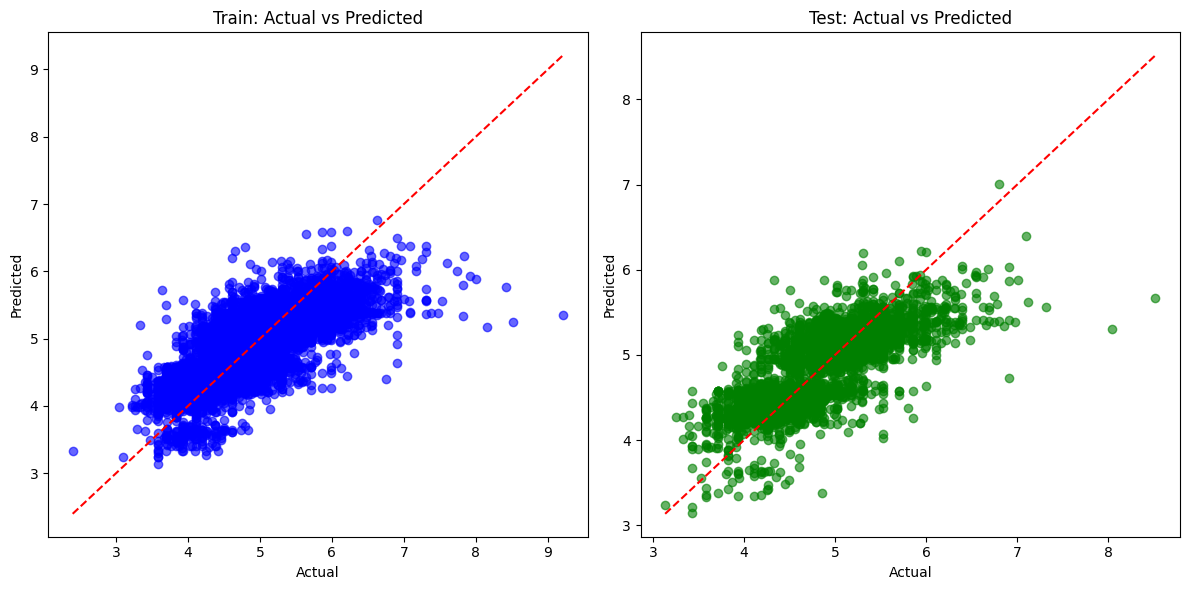

In [59]:
import matplotlib.pyplot as plt

# Plotting predictions vs actual values for training set
plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train_cleaned, y_train_pred_ridge, color='blue', alpha=0.6)
plt.plot([min(y_train_cleaned), max(y_train_cleaned)], [min(y_train_cleaned), max(y_train_cleaned)], color='red', linestyle='--')
plt.title('Train: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting predictions vs actual values for testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test_cleaned, y_test_pred_ridge, color='green', alpha=0.6)
plt.plot([min(y_test_cleaned), max(y_test_cleaned)], [min(y_test_cleaned), max(y_test_cleaned)], color='red', linestyle='--')
plt.title('Test: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

The analysis involved several key steps, including data cleaning, feature selection, and regression modeling, all aimed at predicting Airbnb prices. The initial data preprocessing included standardizing column names for consistency, encoding categorical variables to make them machine-readable, and applying a log transformation to the target variable, Price, to address skewness. During exploratory data analysis, it became evident that Room Type had the strongest influence on pricing, while Number of Reviews showed a weaker correlation.

Simple linear regression models were then tested for each individual feature, and Room Type emerged as the best predictor, with the lowest RMSE of 0.4348 on the test set. This suggests that while Room Type is a key determinant of price, the similar RMSE values between training and test sets indicate minimal overfitting. However, this also suggests that the models might be too simplistic and may not fully capture the complex pricing patterns that can be influenced by multiple interacting factors.

To improve the model's performance, adding polynomial transformations and interaction terms (such as Beds * Number of Reviews) could help better capture any nonlinear relationships present in the data. In addition, employing more advanced regularization techniques, like Ridge regression, was shown to be effective in reducing error. When quadratic features were incorporated, the Ridge regression model outperformed the simpler models, with a test RMSE of 0.3768.

8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and
? We'll cover the Lasso later in detail in class.

In [60]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Define Lasso model with alpha (regularization strength)
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Calculate RMSE
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

# Print RMSE results
print(f"Lasso Regression RMSE: Train = {train_rmse_lasso:.4f}, Test = {test_rmse_lasso:.4f}")

# Identify selected features (nonzero coefficients)
selected_features = X_train.columns[lasso_model.coef_ != 0]
print("Selected Features by Lasso:", selected_features.tolist())


Lasso Regression RMSE: Train = 0.4059, Test = 0.4086
Selected Features by Lasso: ['Review Scores Rating', 'Beds', 'Number Of Reviews', 'Neighbourhood', 'Property Type', 'Room Type']
